<a href="https://www.kaggle.com/code/edrickkesuma/tabular-playground-series-pollution-with-xgboost?scriptVersionId=91089270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


## Read data into dataframes

In [2]:
# Use date_time as index as every row is unique and provides no predictive power
train_data = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv', parse_dates=True, index_col=['date_time'])
test_data = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv', parse_dates=True, index_col=['date_time'])

## Exploratory Data Analysis (Learn about the features)

In [3]:
train_data

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4


In [4]:
# No missing values and no outliers
train_data.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [5]:
train_data.columns

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deg_C', ylabel='Density'>

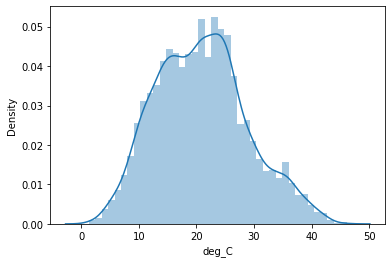

In [6]:
# Check that the features roughly follow a normal distribution
sns.distplot(train_data['deg_C'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='relative_humidity', ylabel='Density'>

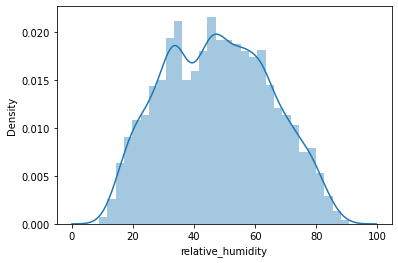

In [7]:
sns.distplot(train_data['relative_humidity'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absolute_humidity', ylabel='Density'>

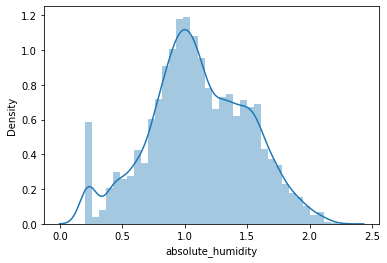

In [8]:
sns.distplot(train_data['absolute_humidity'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sensor_1', ylabel='Density'>

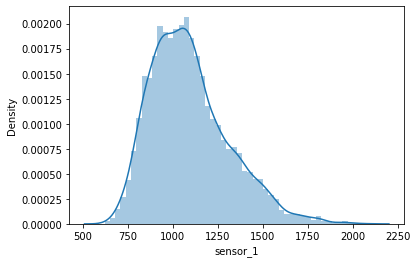

In [9]:
sns.distplot(train_data['sensor_1'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sensor_2', ylabel='Density'>

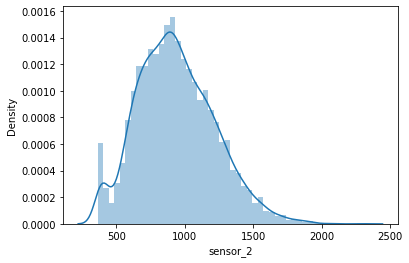

In [10]:
sns.distplot(train_data['sensor_2'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sensor_3', ylabel='Density'>

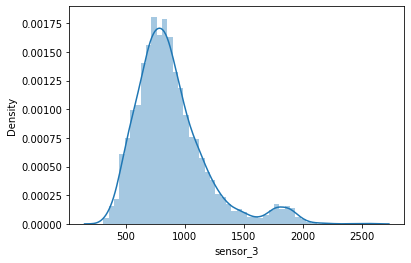

In [11]:
sns.distplot(train_data['sensor_3'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sensor_4', ylabel='Density'>

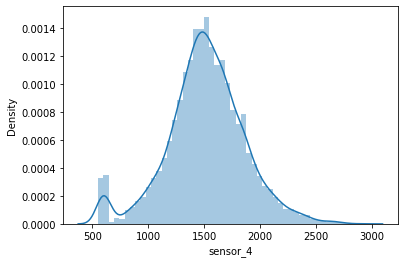

In [12]:
sns.distplot(train_data['sensor_4'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sensor_5', ylabel='Density'>

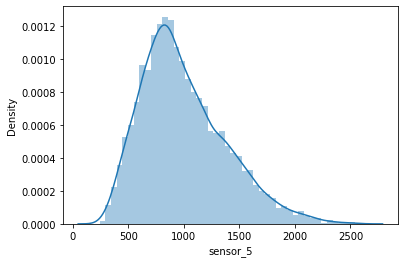

In [13]:
sns.distplot(train_data['sensor_5'])

<AxesSubplot:xlabel='date_time', ylabel='deg_C'>

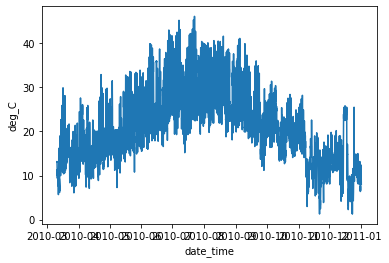

In [14]:
# See trends of features over time
sns.lineplot(x=train_data.index, y=train_data['deg_C'])

<AxesSubplot:xlabel='date_time', ylabel='relative_humidity'>

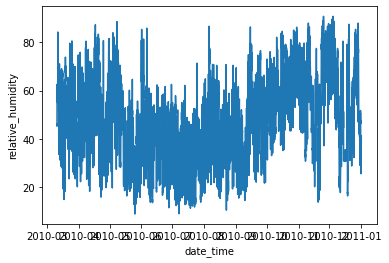

In [15]:
sns.lineplot(x=train_data.index, y=train_data['relative_humidity'])

<AxesSubplot:xlabel='date_time', ylabel='absolute_humidity'>

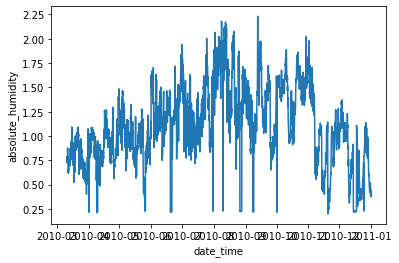

In [16]:
sns.lineplot(x=train_data.index, y=train_data['absolute_humidity'])

In [17]:
# Conclusion: No need for any data cleaning based on the graphs plotted

## Split to validation and training data

In [18]:
from sklearn.model_selection import train_test_split

features = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
labels = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

# Shuffle the data
train_data = train_data.reindex(np.random.permutation(train_data.index))

X = train_data[features]
y = train_data[labels]

# Split data to training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [19]:
X_train.shape

(5333, 8)

## Creating XGBoost models

In [20]:
from xgboost import XGBRegressor

# Create models (hyperparameters adjusted according to mse)
model_carbon = XGBRegressor(n_estimators=500, max_depth=50, learning_rate=0.01)
model_benzene = XGBRegressor(n_estimators=500, max_depth=50, learning_rate=0.03)
model_nitrogen = XGBRegressor(n_estimators=500, max_depth=50, learning_rate=0.1)

model_carbon.fit(X_train, y_train['target_carbon_monoxide'])
model_benzene.fit(X_train, y_train['target_benzene'])
model_nitrogen.fit(X_train, y_train['target_nitrogen_oxides'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Testing the results on validation data

In [21]:
# Validation predictions
predicted_carbon = model_carbon.predict(X_valid)
predicted_benzene = model_benzene.predict(X_valid)
predicted_nitrogen = model_nitrogen.predict(X_valid)

In [22]:
y_valid

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,
2010-11-04 21:00:00,3.5,22.2,489.6
2010-05-10 06:00:00,1.7,9.1,126.4
2010-03-22 12:00:00,1.9,9.0,123.2
2010-12-22 22:00:00,3.5,10.6,534.2
2010-07-27 17:00:00,1.9,11.3,123.0
...,...,...,...
2010-10-03 04:00:00,0.7,4.1,88.2
2010-11-05 10:00:00,4.5,25.2,631.7
2010-05-21 02:00:00,0.3,2.3,34.3


In [23]:
predicted_nitrogen

array([503.0322  , 159.72816 , 122.035645, ...,  43.74204 ,  20.734331,
       121.52785 ], dtype=float32)

In [24]:
def mean_squared_error(predicted_numbers, label_name):
    total_squared_error = 0
    num_of_records = y_valid.shape[0]
    for i in range(num_of_records):
        total_squared_error += (y_valid[label_name].iloc[i] - predicted_numbers[i])**2
    mse = (1/num_of_records) * total_squared_error
    return mse

In [25]:
mean_squared_error(predicted_carbon, 'target_carbon_monoxide')

0.28292161237286306

In [26]:
mean_squared_error(predicted_benzene, 'target_benzene')

1.5913756578204479

In [27]:
mean_squared_error(predicted_nitrogen, 'target_nitrogen_oxides')

6629.10464416421

In [28]:
# Use these values to go back and do hyperparameter tuning when creating the model

## Creating the submission csv

In [29]:
# Realizing I need to use date_time for the submission, so I'm converting the index to a column again
date_time_col = test_data.index
date_time_col

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2011-04-04 05:00:00', '2011-04-04 06:00:00',
               '2011-04-04 07:00:00', '2011-04-04 08:00:00',
               '2011-04-04 09:00:00', '2011-04-04 10:00:00',
               '2011-04-04 11:00:00', '2011-04-04 12:00:00',
               '2011-04-04 13:00:00', '2011-04-04 14:00:00'],
              dtype='datetime64[ns]', name='date_time', length=2247, freq=None)

In [30]:
# Create the submission dataframe
submission_df = pd.DataFrame(data=date_time_col, columns=['date_time'])
submission_df

,date_time
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
2242,2011-04-04 10:00:00
2243,2011-04-04 11:00:00
2244,2011-04-04 12:00:00
2245,2011-04-04 13:00:00


In [31]:
submission_df['target_carbon_monoxide'] = model_carbon.predict(test_data)
submission_df['target_benzene'] = model_benzene.predict(test_data)
submission_df['target_nitrogen_oxides'] = model_nitrogen.predict(test_data)
submission_df

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.388687,4.100227,186.500259
1,2011-01-01 01:00:00,2.057803,8.058478,283.018372
2,2011-01-01 02:00:00,1.682934,7.550663,300.318451
3,2011-01-01 03:00:00,1.928716,8.129126,344.559387
4,2011-01-01 04:00:00,1.581539,6.489048,239.167252
...,...,...,...,...
2242,2011-04-04 10:00:00,3.078983,12.609432,581.172852
2243,2011-04-04 11:00:00,1.981583,8.943998,289.651001
2244,2011-04-04 12:00:00,2.672358,12.089058,287.380859
2245,2011-04-04 13:00:00,2.026008,10.903982,195.029404


In [32]:
# Convert the dataframe to csv
submission_df.to_csv('pollution_submission.csv', index=False)